<a href="https://colab.research.google.com/github/saadkiet/CNN-FOR-MNIST-Project-/blob/master/CNN_FOR_MNIST_(Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 : Install and Step up

In [0]:
pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 21kB/s 
     |████████████████████████████████| 3.9MB 50.7MB/s 
     |████████████████████████████████| 450kB 53.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=76e44baf6c948e947e00ece04744548ed51b4baf18ff2bc5ce7e9da0a649b584
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstall

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

In [0]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization

# Step 2 : Importing MNIST Dataset

In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
xtrain.shape, ytrain.shape

((60000, 28, 28), (60000,))

In [0]:
xtrain,xtest=xtrain/255,xtest/255

In [0]:
xtrain.max(),xtrain.min()

(1.0, 0.0)

In [0]:
xtrain[0].shape

(28, 28)

In [0]:
xtrain=np.expand_dims(xtrain,-1)

In [0]:
xtrain[0].shape

(28, 28, 1)

In [0]:
xtest=np.expand_dims(xtest,-1)

In [0]:
xtrain[0].shape

(28, 28, 1)

# Step 3 : Building The CNN model

In [0]:
# Build the model using the functional API
i = Input(shape=xtrain[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496 

In [0]:
# Compile
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Fit
r1 = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 180us/sample - loss: 0.0160 - accuracy: 0.9955 - val_loss: 0.0173 - val_accuracy: 0.9948
Epoch 2/20
60000/60000 [==============================] - 11s 176us/sample - loss: 0.0116 - accuracy: 0.9968 - val_loss: 0.0185 - val_accuracy: 0.9949
Epoch 3/20
60000/60000 [==============================] - 11s 176us/sample - loss: 0.0091 - accuracy: 0.9973 - val_loss: 0.0309 - val_accuracy: 0.9928
Epoch 4/20
60000/60000 [==============================] - 10s 175us/sample - loss: 0.0086 - accuracy: 0.9973 - val_loss: 0.0215 - val_accuracy: 0.9944
Epoch 5/20
60000/60000 [==============================] - 11s 175us/sample - loss: 0.0085 - accuracy: 0.9977 - val_loss: 0.0284 - val_accuracy: 0.9935
Epoch 6/20
60000/60000 [==============================] - 10s 173us/sample - loss: 0.0067 - accuracy: 0.9982 - val_loss: 0.0277 - val_accuracy: 0.9941
Epoch 7/20
60000/60000 [====================

# Step 4 : Making Predictions

In [0]:
ypred2=model.predict(xtest)

In [0]:
print(ypred2)

[[6.8613575e-26 3.5576480e-16 8.0172368e-20 ... 1.0000000e+00
  1.9301391e-24 3.2230438e-15]
 [2.7581849e-21 8.1810487e-18 1.0000000e+00 ... 9.9425210e-17
  3.6014498e-25 2.7472979e-27]
 [8.4901455e-27 1.0000000e+00 1.4248709e-28 ... 1.2830696e-24
  3.6277941e-28 1.0740333e-33]
 ...
 [0.0000000e+00 5.2402074e-29 0.0000000e+00 ... 0.0000000e+00
  3.1221530e-38 1.2379118e-35]
 [7.0792164e-33 3.9457898e-32 2.1002828e-32 ... 5.4623271e-32
  3.3023019e-27 3.4373394e-33]
 [6.0172401e-29 1.1989596e-29 8.9958584e-33 ... 0.0000000e+00
  3.7073805e-30 0.0000000e+00]]


In [0]:
ypred2=np.argmax(ypred2,axis=1)

In [0]:
print(ypred2)

[7 2 1 ... 4 5 6]


# Step 5 : Evaluating Model

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [0]:
cm1=confusion_matrix(ypred2,ytest)
print(cm1)


[[ 978    0    1    0    0    0    1    0    1    1]
 [   0 1132    0    0    0    0    1    4    0    0]
 [   0    1 1025    0    0    0    0    4    1    1]
 [   0    0    1 1009    0    6    0    0    2    0]
 [   0    0    0    0  974    0    0    0    0    6]
 [   0    0    0    1    0  882    0    0    0    2]
 [   1    1    1    0    1    4  956    0    0    0]
 [   1    1    4    0    0    0    0 1020    0    1]
 [   0    0    0    0    0    0    0    0  970    0]
 [   0    0    0    0    7    0    0    0    0  998]]


In [0]:
print(accuracy_score(ypred2,ytest))

0.9944


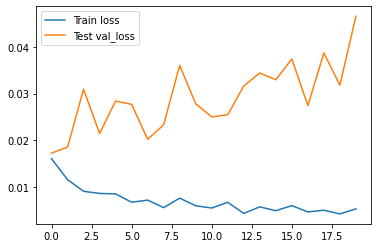

In [0]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r1.history['loss'], label='Train loss')
plt.plot(r1.history['val_loss'], label='Test val_loss')
plt.legend()

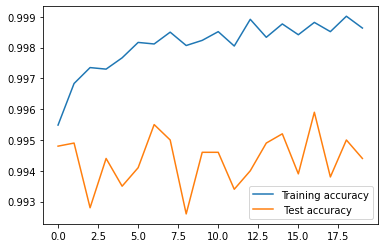

In [0]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r1.history['accuracy'], label='Training accuracy')
plt.plot(r1.history['val_accuracy'], label=' Test accuracy')
plt.legend()

Confusion matrix, without normalization
[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1132    1    0    0    0    1    1    0    0]
 [   1    0 1025    1    0    0    1    4    0    0]
 [   0    0    0 1009    0    1    0    0    0    0]
 [   0    0    0    0  974    0    1    0    0    7]
 [   0    0    0    6    0  882    4    0    0    0]
 [   1    1    0    0    0    0  956    0    0    0]
 [   0    4    4    0    0    0    0 1020    0    0]
 [   1    0    1    2    0    0    0    0  970    0]
 [   1    0    1    0    6    2    0    1    0  998]]


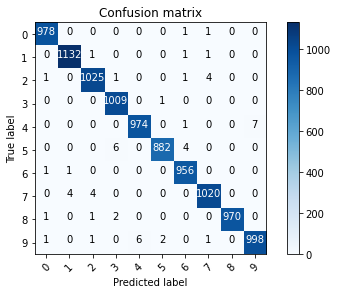

In [0]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(xtest).argmax(axis=1)
cm = confusion_matrix(ytest, p_test)
plot_confusion_matrix(cm, list(range(10)))

# IMPROVING MNIST RESULTS

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
data_generator=ImageDataGenerator(width_shift_range=0.1,horizontal_flip=True,height_shift_range=0.1)

In [0]:
batch_size=32
train_generator=data_generator.flow(xtrain,ytrain,batch_size=batch_size)

In [0]:
steps_per_epoch = xtrain.shape[0] // batch_size
r2=model.fit(train_generator,epochs=20,steps_per_epoch=steps_per_epoch,validation_data=(xtest,ytest))

  ...
    to  
  ['...']
Train for 1875 steps, validate on 10000 samples
Epoch 1/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0734 - accuracy: 0.9795 - val_loss: 0.0337 - val_accuracy: 0.9897
Epoch 2/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0419 - accuracy: 0.9863 - val_loss: 0.0364 - val_accuracy: 0.9890
Epoch 3/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0372 - accuracy: 0.9884 - val_loss: 0.0387 - val_accuracy: 0.9877
Epoch 4/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0358 - accuracy: 0.9897 - val_loss: 0.0263 - val_accuracy: 0.9922
Epoch 5/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0327 - accuracy: 0.9896 - val_loss: 0.0313 - val_accuracy: 0.9901
Epoch 6/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0314 - accuracy: 0.9902 - val_loss: 0.0312 - val_accuracy: 0.9901
Epoch 7/20
1875/1875 [=============================

In [0]:
ypred3=model.predict(xtest)

In [0]:
ypred3=np.argmax(ypred3,axis=1)

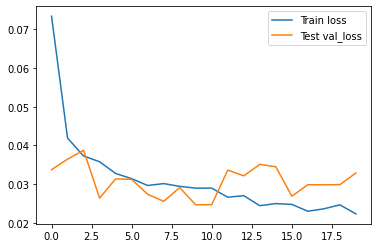

In [0]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r2.history['loss'], label='Train loss')
plt.plot(r2.history['val_loss'], label='Test val_loss')
plt.legend()

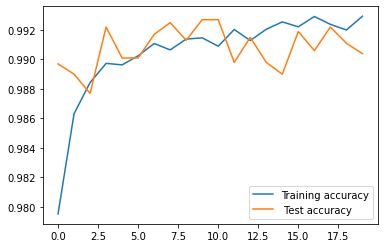

In [0]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r2.history['accuracy'], label='Training accuracy')
plt.plot(r2.history['val_accuracy'], label=' Test accuracy')
plt.legend()

In [0]:
cm2=confusion_matrix(ypred3,ytest)
print(cm2)

[[ 973    0    1    0    0    0    6    0    0    0]
 [   0 1134    2    0    1    0    3    4    0    0]
 [   0    0 1010    0    0   11    7    2    1    4]
 [   1    1    2 1009    0    3    0    0    1    1]
 [   0    0    0    0  975    0    0    0    0    4]
 [   0    0    5    1    0  873    0    2    0    0]
 [   2    0    9    0    0    2  940    0    0    0]
 [   0    0    3    0    0    3    0 1020    0    0]
 [   1    0    0    0    1    0    2    0  972    2]
 [   3    0    0    0    5    0    0    0    0  998]]


In [0]:
print(accuracy_score(ypred3,ytest))

0.9904
